In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
#import seaborn as sns
import timeit
import random
from dask.diagnostics import ProgressBar


In [2]:
ProgressBar().register()

In [5]:
def subset_process_time(ds):
    #subset for the variable(s)
    ds = ds['w']
    ds['time'] = ds.time.dt.round('T')
    #IOP02
    ds['time'] = pd.to_datetime('2019-08-23') + ds['time'].values
    #IOP03
    #ds['time'] = pd.to_datetime('2019-09-24') + ds['time'].values
    return(ds)


In [4]:
def process_time(ds):
    #round time to the nearest minute (30minute for PALM output)
    ds['time'] = ds.time.dt.round('T')
    ds['time'] = pd.to_datetime('2019-08-23') + ds['time'].values
    return(ds)

In [6]:
#source = 'ches_IOP3_parent_child1.'
#folder_list=['27054','18825','17083','17446','6336','20526','8084','19605','11458','5386']
#list all the folders inside an ensemble member
#read the required data from those folders and combine them into one dataset, for w for now.
#
ensemble_numbers = np.arange(1,9)
w_list = []


#loop through ensemble members
for member_num in ensemble_numbers:    

    start_time = timeit.default_timer()
    source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
    file = 'DATA_3D_AV_NETCDF_N02slice' 

    #Make a folder list and read in all the files from those folders. 
    folder_list = os.listdir(source_folder) 
    folder_list.sort() 
    file_list = [] 
    for folder in folder_list: 
        file_list.append(source_folder + '/' +folder+'/'+file) 
    file_list.sort()
    print(folder_list)

    #combine all the data along the time dimenstion 
    #don't combine them sequentially, but infer the sequence from coordinate values 
    #do this in parallel 
    #pull in only those values with a time dimension 
    ds = xr.open_mfdataset(file_list,parallel=True,preprocess=subset_process_time,chunks={'time':5}) 
    ds.close() 
    print('Member',str(member_num),'finished collecting data')    
    #subset for time and day and collect into another list
    #for day1
    #w_list.append(ds)
    elapsed = timeit.default_timer() - start_time
    print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')

['01.ches_IOP2.24050', '02.ches_IOP2.10023', '03.ches_IOP2.28390', '04.ches_IOP2.20941', '05.ches_IOP2.13864', '06.ches_IOP2.31028', '07.ches_IOP2.19931', '08.ches_IOP2.19743']
[########################################] | 100% Completed | 2.68 ss
Member 1 finished collecting data
Done with member 1  Time elapsed  2.6981177143752575 seconds
['01.ches_IOP2.20255', '02.ches_IOP2.13449', '03.ches_IOP2.733', '04.ches_IOP2.18198', '05.ches_IOP2.19794', '06.ches_IOP2.11638', '07.ches_IOP02.31113']
[########################################] | 100% Completed | 417.83 ms
Member 2 finished collecting data
Done with member 2  Time elapsed  0.4342997297644615 seconds
['01.ches_IOP2.2199', '02.ches_IOP2.11581', '03.ches_IOP2.26923', '04.ches_IOP2.16339', '05.ches_IOP2.10214', '06.ches_IOP2.17190', '07.ches_IOP2.19176']
[                                        ] | 0% Completed | 1.00 s ms


KeyboardInterrupt: 

In [4]:
w_list

[<xarray.Dataset>
 Dimensions:  (x: 900, y: 1008, time: 88, zw_3d: 250)
 Coordinates:
   * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
   * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
   * time     (time) datetime64[ns] 2019-08-23T00:30:00 ... 2019-08-24T20:00:00
   * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
 Data variables:
     w        (time, zw_3d, y, x) float32 dask.array<chunksize=(1, 250, 1008, 900), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:  (x: 900, y: 1008, time: 88, zw_3d: 250)
 Coordinates:
   * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
   * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
   * time     (time) datetime64[ns] 2019-08-23T00:30:00 ... 2019-08-24T20:00:00
   * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
 Data variables:
     w        (time, zw_3d, y, x) float32 dask.array<c

In [5]:
w_ds = xr.concat(w_list,'ensemble')

In [9]:
w_ds['w']

<xarray.DataArray 'w' (ensemble: 8, time: 88, zw_3d: 250, y: 1008, x: 900)>
dask.array<concatenate, shape=(8, 88, 250, 1008, 900), dtype=float32, chunksize=(1, 4, 250, 1008, 900), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
  * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
  * time     (time) datetime64[ns] 2019-08-23T00:30:00 ... 2019-08-24T20:00:00
  * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
Dimensions without coordinates: ensemble
Attributes:
    units:      m/s
    long_name:  w

In [7]:
w_data = w_ds.mean('ensemble')

In [8]:
w_data['w']

<xarray.DataArray 'w' (time: 88, zw_3d: 250, y: 1008, x: 900)>
dask.array<mean_agg-aggregate, shape=(88, 250, 1008, 900), dtype=float32, chunksize=(4, 250, 1008, 900), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
  * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
  * time     (time) datetime64[ns] 2019-08-23T00:30:00 ... 2019-08-24T20:00:00
  * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03

Plot from one ensemble member

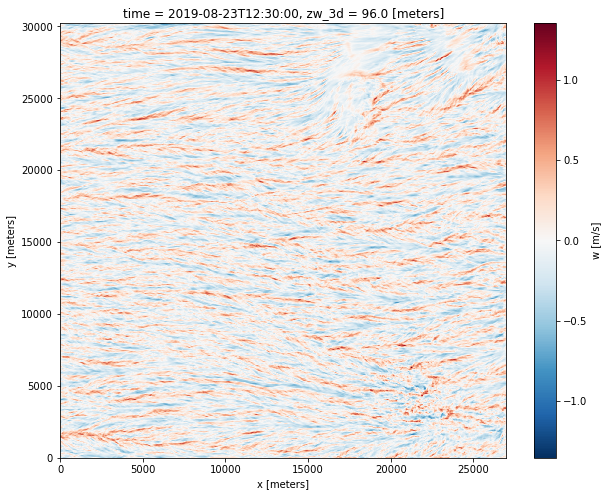

In [67]:
w_ds.sel(ensemble=1,zw_3d=96,time='2019-08-23T12:30:00.000000000').w.plot(figsize=(10,8))

Plot from the ensemble average

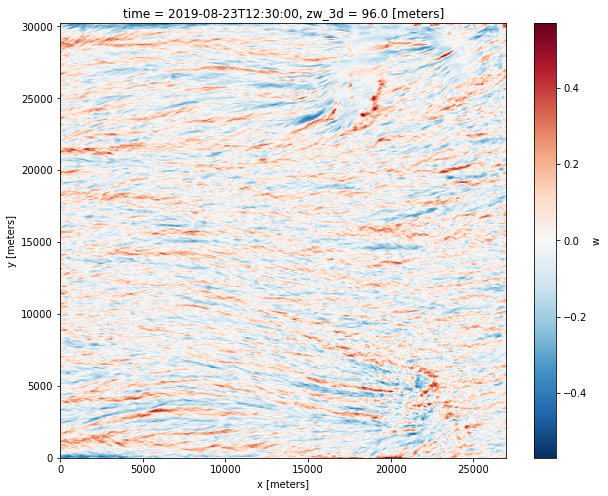

In [10]:
w_data.sel(zw_3d=96,time='2019-08-23T12:30:00.000000000').w.plot(figsize=(10,8))

Try doing the concat for just one member and write the data

In [5]:
#source = 'ches_IOP3_parent_child1.'
#folder_list=['27054','18825','17083','17446','6336','20526','8084','19605','11458','5386']
#list all the folders inside an ensemble member
#read the required data from those folders and combine them into one dataset, for w for now.
#
ensemble_numbers = np.arange(1,9)
w_list = []

member_num = 1
start_time = timeit.default_timer()
source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
file = 'DATA_3D_AV_NETCDF_N02slice' 

#Make a folder list and read in all the files from those folders. 
folder_list = os.listdir(source_folder) 
folder_list.sort() 
file_list = [] 
for folder in folder_list: 
    file_list.append(source_folder + '/' +folder+'/'+file) 
file_list.sort()
print(folder_list)

#combine all the data along the time dimenstion 
#don't combine them sequentially, but infer the sequence from coordinate values 
#do this in parallel 
#pull in only those values with a time dimension 
ds = xr.open_mfdataset(file_list,parallel=True,preprocess=subset_process_time,chunks={'time':None}) 
ds.close() 
print('Member',str(member_num),'finished collecting data')    
#subset for time and day and collect into another list
#for day1
#w_list.append(ds)
elapsed = timeit.default_timer() - start_time
print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')

['01.ches_IOP2.24050', '02.ches_IOP2.10023', '03.ches_IOP2.28390', '04.ches_IOP2.20941', '05.ches_IOP2.13864', '06.ches_IOP2.31028', '07.ches_IOP2.19931', '08.ches_IOP2.19743']
[########################################] | 100% Completed | 5.14 ss
Member 1 finished collecting data
Done with member 1  Time elapsed  5.202362548559904 seconds


In [6]:
ds['w']

<xarray.DataArray 'w' (time: 88, zw_3d: 250, y: 1008, x: 900)>
dask.array<concatenate, shape=(88, 250, 1008, 900), dtype=float32, chunksize=(15, 250, 1008, 900), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
  * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
  * time     (time) datetime64[ns] 2019-08-23T00:30:00 ... 2019-08-24T20:00:00
  * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
Attributes:
    units:      m/s
    long_name:  w

In [7]:
ds['w'].sel(time=slice('2019-08-23T06:00:00.000000000','2019-08-23T18:00:00.000000000'))

<xarray.DataArray 'w' (time: 25, zw_3d: 250, y: 1008, x: 900)>
dask.array<getitem, shape=(25, 250, 1008, 900), dtype=float32, chunksize=(12, 250, 1008, 900), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
  * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
  * time     (time) datetime64[ns] 2019-08-23T06:00:00 ... 2019-08-23T18:00:00
  * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
Attributes:
    units:      m/s
    long_name:  w

In [8]:
ds['w'].sel(time=slice('2019-08-23T06:00:00.000000000','2019-08-23T18:00:00.000000000')).to_netcdf("data/out/w_member1_IOP02_trial.nc")

[########################################] | 100% Completed | 63.53 s


Works! Just do this now, read them all again and then ensemble average on casper

In [5]:
#source = 'ches_IOP3_parent_child1.'
#folder_list=['27054','18825','17083','17446','6336','20526','8084','19605','11458','5386']
#list all the folders inside an ensemble member
#read the required data from those folders and combine them into one dataset, for w for now.
#
ensemble_numbers = np.arange(1,8)

#loop through ensemble members
for member_num in ensemble_numbers:    

    start_time = timeit.default_timer()
    #IOP02
    #source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
    #IOP03
    source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP03/OUTPUT/ensemble.member.'+str(member_num) 
    file = 'DATA_3D_AV_NETCDF_N02slice' 

    #Make a folder list and read in all the files from those folders. 
    folder_list = os.listdir(source_folder) 
    folder_list.sort() 
    file_list = [] 
    for folder in folder_list: 
        file_list.append(source_folder + '/' +folder+'/'+file) 
    file_list.sort()
    print(folder_list)

    #combine all the data along the time dimenstion 
    #don't combine them sequentially, but infer the sequence from coordinate values 
    #do this in parallel 
    #pull in only those values with a time dimension 
    ds = xr.open_mfdataset(file_list,parallel=True)#,preprocess=subset_process_time) 
    ds.close() 
    print('Member',str(member_num),'finished collecting data')    
    ds = ds['w']
    ds['time'] = ds.time.dt.round('T')
    #IOP02
    #ds['time'] = pd.to_datetime('2019-08-23') + ds['time'].values
    #IOP03
    ds['time'] = pd.to_datetime('2019-09-24') + ds['time'].values
    fname = 'data/out/w_member' + str(member_num) + '_IOP03_day2.nc'
    ds.sel(time=slice('2019-09-25T06:00:00.000000000','2019-09-25T18:00:00.000000000')).load().to_netcdf(fname)
    elapsed = timeit.default_timer() - start_time
    print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')

['01.ches_IOP3.19457', '02.ches_IOP3.8195', '03.ches_IOP3.189', '04.ches_IOP3.4230', '05.ches_IOP3.25038', '06.ches_IOP3.10580', '07.ches_IOP3.3465', '08.ches_IOP3.7653', '09. ches_IOP3.14688']
[########################################] | 100% Completed |  1.5s
Member 1 finished collecting data
[########################################] | 100% Completed |  2min 57.3s
Done with member 1  Time elapsed  347.96084047388285 seconds
['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
[########################################] | 100% Completed |  4.8s
Member 2 finished collecting data
[########################################] | 100% Completed |  2min 17.0s
Done with member 2  Time elapsed  299.21163650183007 seconds
['1_ches_IOP3.18694', '2_ches_IOP3.27730', '3_ches_IOP3.19860', '4_ches_IOP3.15061', '5_ches_IOP3.28948', '6_ches_IOP3.21641', '7_ches_IOP3.7814', '8_ches_IOP3.12937']
[############

For IOP03, redoing member number 0

In [6]:
#source = 'ches_IOP3_parent_child1.'
#folder_list=['27054','18825','17083','17446','6336','20526','8084','19605','11458','5386']
#list all the folders inside an ensemble member
#read the required data from those folders and combine them into one dataset, for w for now.
#
member_num = 0
start_time = timeit.default_timer()
#IOP02
#source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
#IOP03
source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP03/OUTPUT/ensemble.member.'+str(member_num) 
file = 'OUTPUT/DATA_3D_AV_NETCDF_N02slice' 

#Make a folder list and read in all the files from those folders. 
folder_list = os.listdir(source_folder) 
folder_list.sort() 
file_list = [] 
for folder in folder_list: 
    file_list.append(source_folder + '/' +folder+'/'+file) 
file_list.sort()
print(folder_list)

#combine all the data along the time dimenstion 
#don't combine them sequentially, but infer the sequence from coordinate values 
#do this in parallel 
#pull in only those values with a time dimension 
ds = xr.open_mfdataset(file_list,parallel=True)#,preprocess=subset_process_time) 
ds.close() 
print('Member',str(member_num),'finished collecting data')    
ds = ds['w']
ds['time'] = ds.time.dt.round('T')
#IOP02
#ds['time'] = pd.to_datetime('2019-08-23') + ds['time'].values
#IOP03
ds['time'] = pd.to_datetime('2019-09-24') + ds['time'].values
fname = 'data/out/w_member' + str(member_num) + '_IOP03_day1.nc'
ds.sel(time=slice('2019-09-24T06:00:00.000000000','2019-09-24T18:00:00.000000000')).load().to_netcdf(fname)
elapsed = timeit.default_timer() - start_time
print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')

['01.ches_IOP3.14592', '02.ches_IOP3.660', '03.ches_IOP3.19260', '04.ches_IOP3.22682', '05.ches_IOP3.31133', '06.ches_IOP3.29659', '07.ches_IOP3.19900', '08.ches_IOP3.24658', '09.ches_IOP3.23660', '10.ches_IOP3.5654', '11.ches_IOP3.1905', '12.ches_IOP3.27019', '13.ches_IOP3.9399', '14.ches_IOP3.5300', '15.ches_IOP3.17284', '16.ches_IOP3.4936', '17.ches_IOP3.29670', '18.ches_IOP3.8982']
[########################################] | 100% Completed | 7.10 ss
Member 0 finished collecting data
[########################################] | 100% Completed | 22.59 s
Done with member 0  Time elapsed  83.69468100741506 seconds


In [13]:
ds

<xarray.DataArray 'w' (time: 86, zw_3d: 150, y: 1008, x: 900)>
dask.array<concatenate, shape=(86, 150, 1008, 900), dtype=float32, chunksize=(15, 150, 1008, 900), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
  * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
  * time     (time) datetime64[ns] 2019-09-24T00:30:00 ... 2019-09-25T19:00:00
  * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 1.764e+03 1.776e+03 1.788e+03
Attributes:
    units:      m/s
    long_name:  w

Check data

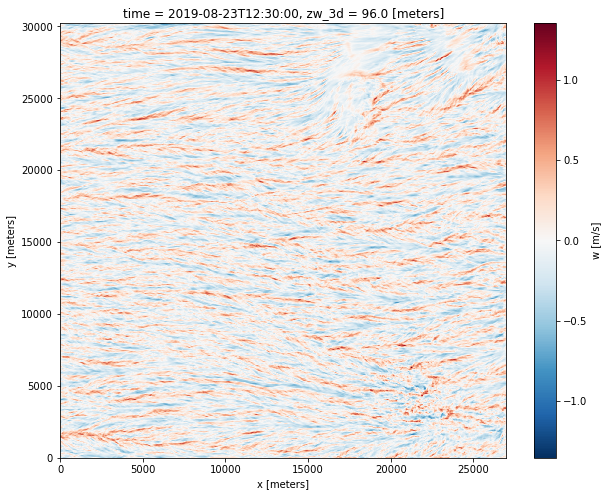

In [16]:
check_w = xr.open_dataset('data/out/w_member2_IOP02.nc')
check_w.close()
check_w.sel(zw_3d=96,time='2019-08-23T12:30:00.000000000').w.plot(figsize=(10,8))

looks good!

Just pull in data for one ensemble member and check the above canopy temperature and fluxes

In [7]:
start_time = timeit.default_timer()
member_num = 1
source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.1'
file = 'DATA_3D_AV_NETCDF_N02slice' 

#Make a folder list and read in all the files from those folders. 
folder_list = os.listdir(source_folder) 
folder_list.sort() 
file_list = [] 
for folder in folder_list: 
    file_list.append(source_folder + '/' +folder+'/'+file) 
file_list.sort()
print(folder_list)

#combine all the data along the time dimenstion 
#don't combine them sequentially, but infer the sequence from coordinate values 
#do this in parallel 
#pull in only those values with a time dimension 
ds = xr.open_mfdataset(file_list,parallel=True,preprocess=process_time,chunks={'x':None}) 
ds.close() 
print('Member',str(member_num),'finished collecting data')    
#subset for time and day and collect into another list
#for day1
#w_list.append(ds)
#fname = 'data/out/w_member' + str(member_num) + '_IOP02.nc'

['01.ches_IOP2.24050', '02.ches_IOP2.10023', '03.ches_IOP2.28390', '04.ches_IOP2.20941', '05.ches_IOP2.13864', '06.ches_IOP2.31028', '07.ches_IOP2.19931', '08.ches_IOP2.19743']
Member 1 finished collecting data


In [8]:
ds

<xarray.Dataset>
Dimensions:                (x: 900, time: 88, y: 1008, xu: 900, yv: 1008,
                            zu_3d: 250, zw_3d: 250, zpc_3d: 4)
Coordinates:
  * x                      (x) float64 15.0 45.0 75.0 ... 2.696e+04 2.698e+04
  * y                      (y) float64 15.0 45.0 75.0 ... 3.02e+04 3.022e+04
  * xu                     (xu) float64 0.0 30.0 60.0 ... 2.694e+04 2.697e+04
  * yv                     (yv) float64 0.0 30.0 60.0 ... 3.018e+04 3.021e+04
  * time                   (time) datetime64[ns] 2019-08-23T00:30:00 ... 2019...
  * zu_3d                  (zu_3d) float64 0.0 6.0 18.0 ... 2.97e+03 2.982e+03
  * zw_3d                  (zw_3d) float64 0.0 12.0 24.0 ... 2.976e+03 2.988e+03
  * zpc_3d                 (zpc_3d) float64 0.0 6.0 18.0 30.0
Data variables: (12/34)
    E_UTM                  (time, x) float64 dask.array<chunksize=(1, 900), meta=np.ndarray>
    N_UTM                  (time, y) float64 dask.array<chunksize=(1, 1008), meta=np.ndarray>
    Eu_UTM                 (time, xu) float64 dask.array<chunksize=(1, 900), meta=np.ndarray>
    Nu_UTM                 (time, y) float64 dask.array<chunksize=(1, 1008), meta=np.ndarray>
    Ev_UTM                 (time, x) float64 dask.array<chunksize=(1, 900), meta=np.ndarray>
    Nv_UTM                 (time, yv) float64 dask.array<chunksize=(1, 1008), meta=np.ndarray>
    ...                     ...
    wtheta                 (time, zw_3d, y, x) float32 dask.array<chunksize=(1, 250, 1008, 900), meta=np.ndarray>
    wq                     (time, zw_3d, y, x) float32 dask.array<chunksize=(1, 250, 1008, 900), meta=np.ndarray>
    ws                     (time, zw_3d, y, x) float32 dask.array<chunksize=(1, 250, 1008, 900), meta=np.ndarray>
    pcm_heatrate           (time, zpc_3d, y, x) float32 dask.array<chunksize=(1, 4, 1008, 900), meta=np.ndarray>
    pcm_transpirationrate  (time, zpc_3d, y, x) float32 dask.array<chunksize=(1, 4, 1008, 900), meta=np.ndarray>
    pcm_latentrate         (time, zpc_3d, y, x) float32 dask.array<chunksize=(1, 4, 1008, 900), meta=np.ndarray>
Attributes: (12/28)
    title:           PALM 21.10-rc.2  run: ches_IOP2.01  nest-id: 02  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-06-18 15:49:08 -06
    data_content:    3d_av
    version:         2
    origin_time:     2019-08-22 05:00:00 +00
    ...              ...
    references:      
    keywords:        example, PALM-4U
    licence:         
    comment:         Generic crossing example
    time_avg:         1800.0 s avg
    VAR_LIST:        ;u;v;w;e;uu;vv;ww;uv;uw;vw;theta;q;s;wtheta;wq;ws;pcm_he...

In [9]:
ds['theta']

<xarray.DataArray 'theta' (time: 88, zu_3d: 250, y: 1008, x: 900)>
dask.array<concatenate, shape=(88, 250, 1008, 900), dtype=float32, chunksize=(15, 250, 1008, 900), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
  * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
  * time     (time) datetime64[ns] 2019-08-23T00:30:00 ... 2019-08-24T20:00:00
  * zu_3d    (zu_3d) float64 0.0 6.0 18.0 30.0 ... 2.958e+03 2.97e+03 2.982e+03
Attributes:
    units:      K
    long_name:  theta

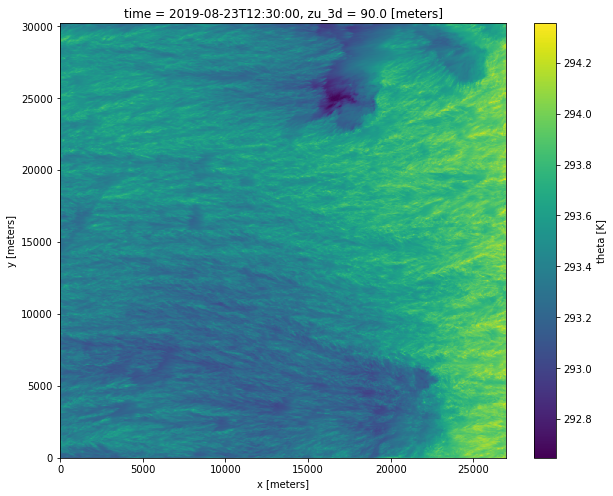

In [22]:
ds['theta'].sel(zu_3d=90,time='2019-08-23T12:30:00.000000000').plot(figsize=(10,8))

Calculate and plot the kinematic heat flux at that height

In [28]:
def select_time_interp(ds,var):
    out = ds[var].rename({'zu_3d': 'zw_3d'}).sel(time='2019-08-23T12:30:00.000000000').interp_like(ds.w)
    return(out)


In [31]:
select_time_interp(ds,'q')

<xarray.DataArray 'q' (zw_3d: 250, y: 1008, x: 900)>
dask.array<transpose, shape=(250, 1008, 900), dtype=float32, chunksize=(250, 1008, 900), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2019-08-23T12:30:00
  * x        (x) float64 15.0 45.0 75.0 105.0 ... 2.692e+04 2.696e+04 2.698e+04
  * y        (y) float64 15.0 45.0 75.0 105.0 ... 3.016e+04 3.02e+04 3.022e+04
  * zw_3d    (zw_3d) float64 0.0 12.0 24.0 ... 2.964e+03 2.976e+03 2.988e+03
Attributes:
    units:      kg/kg
    long_name:  q

In [18]:
#calculating flux for 12:30
wtheta_turb = ds.wtheta.sel(time='2019-08-23T12:30:00.000000000') - ds.w.sel(time='2019-08-23T12:30:00.000000000')*select_time_interp(ds,'theta')

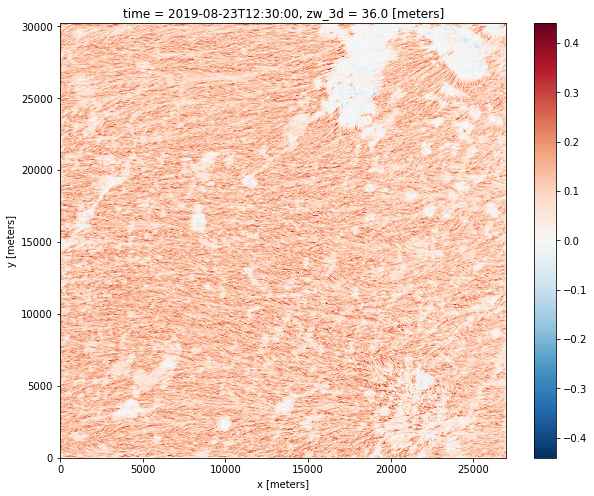

In [26]:
wtheta_turb.sel(zw_3d=36).plot(figsize=(10,8))

In [38]:
#calculating flux for 12:30
wq_turb = ds.wq.sel(time='2019-08-23T12:30:00.000000000') - ds.w.sel(time='2019-08-23T12:30:00.000000000')*select_time_interp(ds,'q')

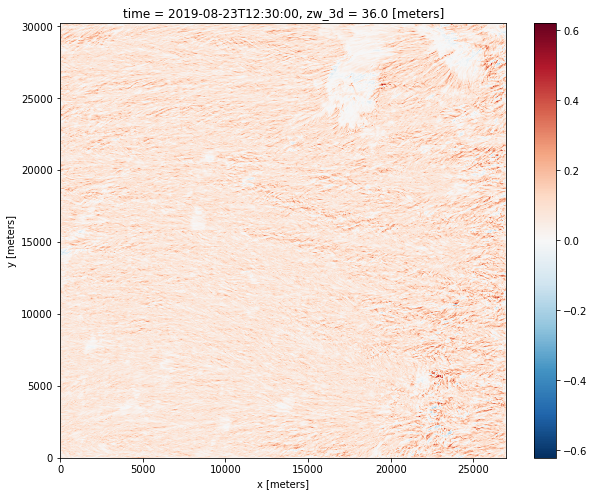

In [39]:
(wq_turb.sel(zw_3d=36)*1000).plot(figsize=(10,8))

Calculate ensemble average of the spatial mean for w_wind

In [ ]:
ensemble_spatial_mean_w = data_list[0].mean('x').mean('y')

size = len(data_list)
# #size = 2
for i in range(1,size):
    ensemble_spatial_mean_w = ensemble_spatial_mean_w + data_list[i].mean('x').mean('y')

ensemble_spatial_mean_w = ensemble_spatial_mean_w/size
ensemble_spatial_mean_w

Calculate ensemble mean for custom number of runs and Calculate ensemble average of the spatial mean for w_wind

In [ ]:
ensemble_mean = data_list[0]

size = 7
for i in range(1,size):
    ensemble_mean = ensemble_mean + data_list[i]

ensemble_mean = ensemble_mean/size

ensemble_spatial_mean = data_list[0].mean('x').mean('y')

#size = len(data_list)
size = 7
for i in range(1,size):
    ensemble_spatial_mean = ensemble_spatial_mean + data_list[i].mean('x').mean('y')

ensemble_spatial_mean = ensemble_spatial_mean/size

#ensemble_mean_w_3_runs =  ensemble_mean
#ensemble_spatial_mean_w_3_runs = ensemble_spatial_mean

#ensemble_mean_w_5_runs =  ensemble_mean
#ensemble_spatial_mean_w_5_runs = ensemble_spatial_mean

ensemble_mean_w_7_runs =  ensemble_mean
ensemble_spatial_mean_w_7_runs = ensemble_spatial_mean


In [ ]:
fig = plt.figure(figsize=(8,8))
data_list[0].sel(zw_3d=504).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
ensemble_mean_w.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
#ensemble_mean_w.sel(zu_3d=510).plot()

The heterogeneity induced w_hi = ensemble_mean_w_bar - ensemble_spatial_mean_w_bar

In [ ]:
w_hi = ensemble_mean_w - ensemble_spatial_mean_w

In [ ]:
w_hi

In [ ]:
fig = plt.figure(figsize=(8,8))
w_hi.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
#w_hi.sel(zu_3d=510).plot()

Calculate the variance for the same from its spatial mean:
(spatial_mean_w_hi - w_hi)*(spatial_mean_w_hi - w_hi)



In [ ]:
fig = plt.figure(figsize=(8,8))
w_hi.var('y',skipna=True).mean('x').plot(y='zw_3d')

fig = plt.figure(figsize=(8,8))
w_hi.var('x',skipna=True).mean('y').plot(y='zw_3d')


In [ ]:
print('Plot the spatial variance profiles for ensemble member values')
fig = plt.figure(figsize=(7,7))
data_list[0].var('x',skipna=True).mean('y').plot(y='zw_3d',color='b',label='1 run')
w_hi_3_runs.var('x',skipna=True).mean('y').plot(y='zw_3d',color='g',label='3 runs')
w_hi_5_runs.var('x',skipna=True).mean('y').plot(y='zw_3d',color='r',label='5 runs')
w_hi_7_runs.var('x',skipna=True).mean('y').plot(y='zw_3d',color='orange',label='7 runs')
w_hi.var('x',skipna=True).mean('y').plot(y='zw_3d',color='k',label='10 runs')
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)



### Combine the code from above to pull in data and calculate heterogeneity induced values

In [ ]:
#Make folder list and read in values

data_list = []
start_time = timeit.default_timer()

for i, name in enumerate(folder_list):
    folder = source + name
    ds = xr.open_dataset(folder + '/' + file)
    ds.close()
    #subset for variables
    data = ds['u']
    #subset for time = 13:30
    data = data.where(data.time.dt.seconds==48600,drop=True).squeeze('time')
    #append the data to the list
    data_list.append(data)
    

#calculate their ensemble mean
#initialize with the first element
ensemble_mean = data_list[0]

size = len(data_list)
#size = 2
for i in range(1,size):
    ensemble_mean = ensemble_mean + data_list[i]

ensemble_mean = ensemble_mean/size


#calculate the spatial mean ( ensemble average of the spatial mean ~ spatial mean)
ensemble_spatial_mean = data_list[0].mean('xu').mean('y')

# size = len(data_list)
# # #size = 2
# for i in range(1,size):
#     ensemble_spatial_mean_w = ensemble_spatial_mean_w + data_list[i].mean('xu').mean('y')

# ensemble_spatial_mean_w = ensemble_spatial_mean_w/size
# ensemble_spatial_mean_w


#calculate the heterogeneity indiced values as the difference of the two
hi = ensemble_mean - ensemble_spatial_mean

# Calculate the variance for the same from its spatial mean: 
#     (spatial_mean_w_hi - w_hi)*(spatial_mean_w_hi - w_hi)




#plots
fig = plt.figure(figsize=(8,8))
data_list[0].sel(zu_3d=510).plot()
fig.suptitle('Cross section plot for one member')

fig = plt.figure(figsize=(8,8))
#ensemble_mean_w.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
ensemble_mean.sel(zu_3d=510).plot()
fig.suptitle('Cross section plot for ensemble mean')


fig = plt.figure(figsize=(8,8))
#w_hi.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
hi.sel(zu_3d=510).plot()
fig.suptitle('Cross section plot of the heterogeneity induced values')

fig = plt.figure(figsize=(8,8))
hi.var('y',skipna=True).mean('xu').plot()
fig.suptitle('The spatial variance profiles for hi')
fig = plt.figure(figsize=(8,8))
hi.var('xu',skipna=True).mean('y').plot()
fig.suptitle('The spatial variance profiles for hi')
      

fig = plt.figure(figsize=(8,8))
data_list[0].var('y',skipna=True).mean('xu').plot()
fig.suptitle('Plot the spatial variance profiles for ensemble member values')
    
      
elapsed = timeit.default_timer() - start_time
print('Time elapsed ',elapsed, 'seconds')


In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(y=504).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(y=833).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(x=447).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(x=666).plot()